In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Pearson Correlation Test

In [199]:
class Pearson_Correlation:

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    self.X_mean = np.mean(X)
    self.Y_mean = np.mean(Y)


  def calculate_numerator(self):
    return np.sum((self.X - self.X_mean)*(self.Y - self.Y_mean))

  def calculate_denominator(self):
    X_mean_diff_sqrt = np.sqrt(np.sum((self.X - self.X_mean)**2))
    Y_mean_diff_sqrt = np.sqrt(np.sum((self.Y - self.Y_mean)**2))
    return X_mean_diff_sqrt*Y_mean_diff_sqrt

  def pearson_coefficient(self):
    return self.calculate_numerator()/self.calculate_denominator()



  


### Covid Case Data - **FL**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


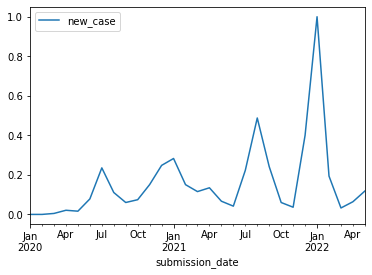

In [200]:

df = pd.read_csv("/content/drive/MyDrive/prob-stats-project-22/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

# Fetch florida state data
df.columns
fl_df = df.loc[df['state'] == 'FL']
# Convert submission_date column into a datetime column
fl_df["submission_date"] = pd.to_datetime(fl_df["submission_date"])
# Sort on the datetime column
fl_df.sort_values('submission_date')
monthly_df = fl_df.groupby(pd.Grouper(key='submission_date', axis=0, freq='M'))['new_case'].mean().copy()
monthly_case_FL_df = monthly_df.reset_index()
monthly_case_FL_df['new_case'] = monthly_case_FL_df['new_case'].astype(float)

monthly_case_FL_df['new_case']=(monthly_case_FL_df['new_case']-monthly_case_FL_df['new_case'].min())/(monthly_case_FL_df['new_case'].max()-monthly_case_FL_df['new_case'].min())
monthly_case_FL_df.plot(x ='submission_date', y='new_case', kind = 'line')	
plt.show()


### Covid Case Data - **CT**

In [201]:

df = pd.read_csv("/content/drive/MyDrive/prob-stats-project-22/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

# Fetch florida state data
df.columns
ct_df = df.loc[df['state'] == 'CT']
# Convert submission_date column into a datetime column
ct_df["submission_date"] = pd.to_datetime(ct_df["submission_date"])
# Sort on the datetime column
ct_df.sort_values('submission_date')
monthly_df = ct_df.groupby(pd.Grouper(key='submission_date', axis=0, freq='M'))['new_case'].mean().copy()
monthly_case_CT_df = monthly_df.reset_index()
monthly_case_CT_df['new_case'] = monthly_case_CT_df['new_case'].astype(float)
monthly_case_CT_df['new_case'] = monthly_case_CT_df['new_case'].apply(lambda x: x + 1)
monthly_case_CT_df['new_case'] = np.log(monthly_case_CT_df['new_case'])

monthly_case_CT_df['new_case']=(monthly_case_CT_df['new_case']-monthly_case_CT_df['new_case'].min())/(monthly_case_CT_df['new_case'].max()-monthly_case_CT_df['new_case'].min())




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Vaccination Data - CT

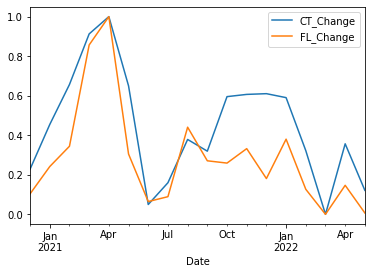

In [202]:
vaccine_df = pd.read_csv("/content/drive/MyDrive/prob-stats-project-22/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv")
vaccine_df_CT = vaccine_df.loc[vaccine_df['Location'] == 'CT']
vaccine_df_CT = vaccine_df_CT[['Date','Distributed']].copy()
vaccine_df_CT["Date"] = pd.to_datetime(vaccine_df_CT["Date"])
vaccine_df_CT.sort_values('Date')
# Fetch florida state data
vaccine_df_CT["CT_Change"] = vaccine_df_CT["Distributed"].diff(-1)
monthly_vaccine_df_CT = vaccine_df_CT.groupby(pd.Grouper(key='Date', axis=0, freq='M'))['CT_Change'].mean().copy()

monthly_vaccine_df_CT = monthly_vaccine_df_CT.reset_index()
monthly_vaccine_df_CT['CT_Change'] = np.log(monthly_vaccine_df_CT['CT_Change'])
monthly_vaccine_df_CT['CT_Change']=(monthly_vaccine_df_CT['CT_Change']-monthly_vaccine_df_CT['CT_Change'].min())/(monthly_vaccine_df_CT['CT_Change'].max()-monthly_vaccine_df_CT['CT_Change'].min())

merged_monthly_vaccine_df = (pd.merge(monthly_vaccine_df_FL, monthly_vaccine_df_CT, on='Date'))
merged_monthly_vaccine_df.plot(x ='Date', y =['CT_Change', 'FL_Change'], kind="line")
plt.show()

# normalized_monthly_vaccine_df_FL


### House Rates

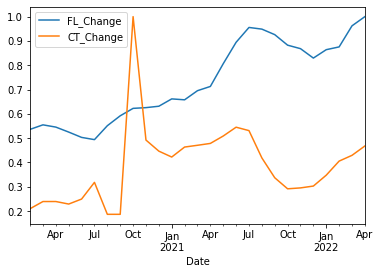

In [203]:
house_df = pd.read_csv("/content/drive/MyDrive/prob-stats-project-22/house_rate.csv")

house_df_t = house_df.T
house_df_fl_ct = house_df_t[[3, 28]].copy()
house_df_fl_ct
house_df_fl_ct.rename(columns={3: 'Florida', 28: 'Connecticut'}, inplace=True)
house_df_fl_ct = house_df_fl_ct.drop(['RegionID','SizeRank', 'RegionName', 'RegionType', 'StateName'])

house_df_fl_ct['Florida'] = house_df_fl_ct['Florida'].astype(float)
house_df_fl_ct['Connecticut'] = house_df_fl_ct['Connecticut'].astype(float)

house_df_fl_ct['FL_Change'] = house_df_fl_ct['Florida'].pct_change()
house_df_fl_ct['FL_Change'] = house_df_fl_ct['FL_Change'].apply(lambda x: x*200)
house_df_fl_ct['FL_Change'] = (house_df_fl_ct['FL_Change']-house_df_fl_ct['FL_Change'].min())/(house_df_fl_ct['FL_Change'].max()-house_df_fl_ct['FL_Change'].min())


house_df_fl_ct['CT_Change'] = house_df_fl_ct['Connecticut'].pct_change()
# print(house_df_fl_ct['CT_Change'])
house_df_fl_ct['CT_Change'] = house_df_fl_ct['CT_Change'].apply(lambda x: x*200)

house_df_fl_ct['CT_Change'] = (house_df_fl_ct['CT_Change']-house_df_fl_ct['CT_Change'].min())/(house_df_fl_ct['CT_Change'].max()-house_df_fl_ct['CT_Change'].min())


house_df_fl_ct_ptc = house_df_fl_ct[['FL_Change', 'CT_Change']].copy()
house_df_fl_ct_ptc = house_df_fl_ct_ptc.reset_index()
house_df_fl_ct_ptc.rename(columns={'index': 'Date'}, inplace=True)


house_df_fl_ct_ptc["Date"] = pd.to_datetime(house_df_fl_ct_ptc["Date"])

house_df_fl_ct_ptc = house_df_fl_ct_ptc[(house_df_fl_ct_ptc['Date'] > '2020-01-31')].copy()
house_df_fl_ct_ptc.reset_index()
house_df_fl_ct_ptc.plot(x ='Date', y=['FL_Change', 'CT_Change'], kind = 'line')	
plt.show()



### a) Pearson Correlation for case, vaccine and house rate data between Jan 2021 to May 2021 (Connecticut)


**January 4:** Healthcare workers began receiving scheduled second vaccination doses for those who had already received one dose.

**February 1:** The mandatory closing time for dine-in restaurants was moved from 10 PM to 11 PM. Mask guidelines, social distancing recommendations, and the 50% capacity limit on houses of worship were left unchanged, but the numerical cap on group size was lifted.[54]

**February 8:** As of this date, more than 50% of the population 75 years old or older was partially vaccinated, leading to the announcement that vaccinations would be opened to those 65 or older.[55]

**May 3:** Connecticut was the first state to fully vaccinate 50% of its adult population.

*RESULTS*:

**Case vs vaccination** = -0.78351845

**House vs vaccination** = 0.86542085

**Case vs House** = -0.98832128

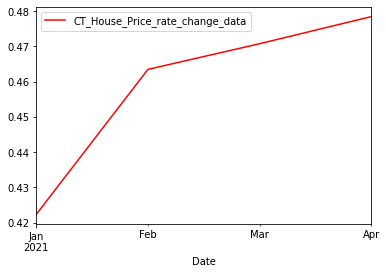

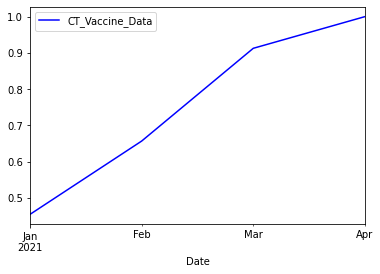

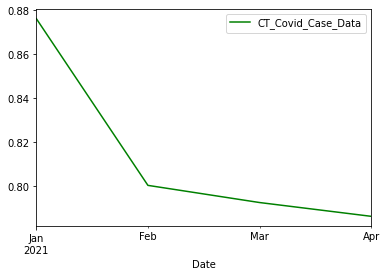

Case vs vaccination 
 -0.8806979440530222
House vs vaccination 
 0.9224044537174
Case vs House 
 -0.993952231720395


In [204]:
a = house_df_fl_ct_ptc[(house_df_fl_ct_ptc['Date'] > '2020-12-31') & (house_df_fl_ct_ptc['Date'] < '2021-05-31')].copy()
b = merged_monthly_vaccine_df[(merged_monthly_vaccine_df['Date'] > '2020-12-31') & (merged_monthly_vaccine_df['Date'] < '2021-05-31')].copy()
f = monthly_case_FL_df[(monthly_case_FL_df['submission_date'] > '2020-12-31') & (monthly_case_FL_df['submission_date'] < '2021-05-31')].copy()
c = monthly_case_CT_df[(monthly_case_CT_df['submission_date'] > '2020-12-31') & (monthly_case_CT_df['submission_date'] < '2021-05-31')].copy()

a.rename(columns={'CT_Change': 'CT_House_Price_rate_change_data'}, inplace=True)
a.plot(x='Date', y='CT_House_Price_rate_change_data', kind='line', color='red')
plt.show()

b.rename(columns={'CT_Change': 'CT_Vaccine_Data'}, inplace=True)
b.plot(x='Date', y='CT_Vaccine_Data', kind='line', color='blue')
plt.show()

c.rename(columns={'submission_date': 'Date', 'new_case': 'CT_Covid_Case_Data'}, inplace=True)
f.rename(columns={'submission_date': 'Date', 'new_case': 'CT_Covid_Case_Data'}, inplace=True)

c.plot(x='Date', y='CT_Covid_Case_Data', kind='line', color='green')
plt.show()

Covid_case_data_fl = f['CT_Covid_Case_Data'].to_numpy()
Covid_case_data_ct = c['CT_Covid_Case_Data'].to_numpy()

vaccine_data = b['CT_Vaccine_Data'].to_numpy()
house_data = a['CT_House_Price_rate_change_data'].to_numpy()

# c.rename(columns={'submission_date': 'Date'}, inplace=True)
# b.rename(columns={'CT_Change': 'CT_Vaccine_Data'}, inplace=True)

# merged_data_a_b = (pd.merge(a, b, on='Date'))
# merged_data_a_b.plot(x ='Date', y =['CT_Change', 'CT_Vaccine'], kind="line")
# plt.show()
# merged_data_a_b_c = (pd.merge(merged_data_a_b, c, on='Date'))

# merged_data_a_b_c.plot(x ='Date', y =['CT_Change', 'CT_Vaccine', 'new_case'], kind="line")
# plt.show()

pearson_object = Pearson_Correlation(vaccine_data, Covid_case_data_ct)
corr_case_vs_vacc = pearson_object.pearson_coefficient()

pearson_object = Pearson_Correlation(house_data, Covid_case_data_ct)
corr_case_vs_house = pearson_object.pearson_coefficient()

pearson_object = Pearson_Correlation(house_data, vaccine_data)
corr_house_vs_vacc = pearson_object.pearson_coefficient()

print("Case vs vaccination \n", corr_case_vs_vacc)
print("House vs vaccination \n", corr_house_vs_vacc)
print("Case vs House \n", corr_case_vs_house)


### b) Pearson Correlation between June 2021 to May 2022, for Vaccination data vs House Price Change Rate

**June 1, 2021**: The Delta variant, first identified in India in late 2020, becomes the dominant variant in the U.S. The variant kicks off a third wave of infections during the summer of 2021.  

**November 26, 2021**: World Health Organization classifies a new variant, Omicron, as a variant of concern after it was first reported by scientists in South Africa. The variant has several mutations in the spike protein that concern scientists around the world. 

*RESULTS*:

**Case Count vs Vaccination Count:** 0.7233065778750303

**HPCR vs Vaccination Count:** -0.8194726285205858

**Case Count vs HPCR:** -0.6476787548384888

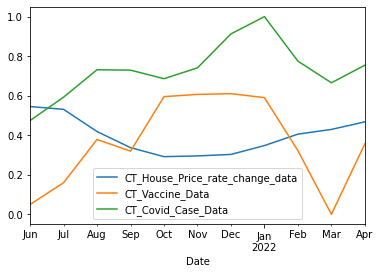

Case vs vaccination 
 0.7233065778750303
House vs vaccination 
 -0.8194726285205858
Case vs House 
 -0.6476787548384888


In [205]:
a = house_df_fl_ct_ptc[(house_df_fl_ct_ptc['Date'] > '2021-05-31') & (house_df_fl_ct_ptc['Date'] < '2022-05-01')].copy()
b = merged_monthly_vaccine_df[(merged_monthly_vaccine_df['Date'] > '2021-05-31') & (merged_monthly_vaccine_df['Date'] < '2022-05-01')].copy()
c = monthly_case_CT_df[(monthly_case_CT_df['submission_date'] > '2021-05-31') & (monthly_case_CT_df['submission_date'] < '2022-05-01')].copy()

a.rename(columns={'CT_Change': 'CT_House_Price_rate_change_data'}, inplace=True)
b.rename(columns={'CT_Change': 'CT_Vaccine_Data'}, inplace=True)
c.rename(columns={'submission_date': 'Date', 'new_case': 'CT_Covid_Case_Data'}, inplace=True)

Covid_case_data_ct = c['CT_Covid_Case_Data'].to_numpy()

vaccine_data = b['CT_Vaccine_Data'].to_numpy()
house_data = a['CT_House_Price_rate_change_data'].to_numpy()

merged_data_a_b = (pd.merge(a, b, on='Date'))
merged_data_a_b_c = (pd.merge(merged_data_a_b, c, on='Date'))

merged_data_a_b_c.plot(x ='Date', y =['CT_House_Price_rate_change_data', 'CT_Vaccine_Data', 'CT_Covid_Case_Data'], kind="line")
plt.show()

pearson_object = Pearson_Correlation(vaccine_data, Covid_case_data_ct)
corr_case_vs_vacc = pearson_object.pearson_coefficient()

pearson_object = Pearson_Correlation(house_data, Covid_case_data_ct)
corr_case_vs_house = pearson_object.pearson_coefficient()

pearson_object = Pearson_Correlation(house_data, vaccine_data)
corr_house_vs_vacc = pearson_object.pearson_coefficient()

print("Case vs vaccination \n", corr_case_vs_vacc)
print("House vs vaccination \n", corr_house_vs_vacc)
print("Case vs House \n", corr_case_vs_house)


### c) Chisquare Tests to test independence of samples

**Qscore** = 751.21

**Degree of Freedom** = (2-1) * (4-1)

**p-value** = 0.0  < 0.05

Chi Square test

In [206]:

def calcualte_expected_matrix(matrix):
  expected_matrix = matrix.copy()
  expected_matrix = expected_matrix.astype(float)
  row_len = matrix.shape[0] - 1
  col_len = matrix.shape[1] - 1
  total_sum = 0
  diff_matrix = expected_matrix
  obs_arr = []
  exp_arr = []
  for i in range(0, row_len):
    for j in range(0, col_len):
        expected_matrix[i,j] = (expected_matrix[i, col_len] * expected_matrix[row_len, j]) / expected_matrix[row_len, col_len]
        obs_arr.append(matrix[i,j])
        exp_arr.append(expected_matrix[i,j])
        diff_matrix[i,j] = ((expected_matrix[i, j] - matrix[i, j])**2)/expected_matrix[i, j]
        total_sum += ((expected_matrix[i, j] - matrix[i, j])**2)/expected_matrix[i, j]


  deg_freedom = row_len * col_len
  print(chisquare(obs_arr, exp_arr, deg_freedom))

  # print(total_sum)
  # print("\n\n Diff Matrix =\n", diff_matrix)
  return expected_matrix



Data processing: To find months with maximum and minimum HPCR

In [207]:
house_data = house_df_fl_ct_ptc[(house_df_fl_ct_ptc['Date'] > '2020-01-31')]
house_data = house_data[ (house_data['Date'] > '2020-12-31') ]

#Calculate month for min rate
min_house_data = house_data[(house_data['CT_Change'] == house_data['CT_Change'].min())]
min_date = min_house_data['Date'].iloc[0]
print(min_date)

#Calculate month for max rate
max_house_data = house_data[(house_data['CT_Change'] == house_data['CT_Change'].max())]
max_date = max_house_data['Date'].iloc[0]
print(max_date)


2021-10-31 00:00:00
2021-06-30 00:00:00


Data processing for chi square case 1: Check the independence between housing price change rate and deaths due to covid in the states of California, Texas, Florida and New York.


In [208]:
df = pd.read_csv("/content/drive/MyDrive/prob-stats-project-22/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

ca_df = df.loc[df['state'] == 'CA']
ca_df["submission_date"] = pd.to_datetime(ca_df["submission_date"])
monthly_df_ca = ca_df.groupby(pd.Grouper(key='submission_date', axis=0, freq='M'))['new_death'].sum()
monthly_case_CA_df = monthly_df_ca.reset_index()
monthly_case_CA_df['new_death'] = monthly_case_CA_df['new_death'].apply(lambda x: x + 1)
monthly_case_CA_df.rename(columns={'new_death': 'CA_death'}, inplace=True)


ct_df = df.loc[df['state'] == 'CT']
ct_df["submission_date"] = pd.to_datetime(ct_df["submission_date"])
monthly_df_ct = ct_df.groupby(pd.Grouper(key='submission_date', axis=0, freq='M'))['new_death'].sum()
monthly_case_CT_df = monthly_df_ct.reset_index()
monthly_case_CT_df['new_death'] = monthly_case_CT_df['new_death'].apply(lambda x: x + 1)
monthly_case_CT_df.rename(columns={'new_death': 'CT_death'}, inplace=True)

fl_df = df.loc[df['state'] == 'FL']
fl_df["submission_date"] = pd.to_datetime(fl_df["submission_date"])
monthly_df_fl = fl_df.groupby(pd.Grouper(key='submission_date', axis=0, freq='M'))['new_death'].sum()
monthly_case_FL_df = monthly_df_fl.reset_index()
monthly_case_FL_df['new_death'] = monthly_case_FL_df['new_death'].apply(lambda x: x + 1)
monthly_case_FL_df.rename(columns={'new_death': 'FL_death'}, inplace=True)

ny_df = df.loc[df['state'] == 'NY']
ny_df["submission_date"] = pd.to_datetime(ny_df["submission_date"])
monthly_df_ny = ny_df.groupby(pd.Grouper(key='submission_date', axis=0, freq='M'))['new_death'].sum()
monthly_case_NY_df = monthly_df_ny.reset_index()
monthly_case_NY_df['new_death'] = monthly_case_NY_df['new_death'].apply(lambda x: x + 1)
monthly_case_NY_df.rename(columns={'new_death': 'NY_death'}, inplace=True)

tx_df = df.loc[df['state'] == 'TX']
tx_df["submission_date"] = pd.to_datetime(tx_df["submission_date"])
monthly_df_tx = tx_df.groupby(pd.Grouper(key='submission_date', axis=0, freq='M'))['new_death'].sum()
monthly_case_TX_df = monthly_df_tx.reset_index()
monthly_case_TX_df['new_death'] = monthly_case_TX_df['new_death'].apply(lambda x: x + 1)
monthly_case_TX_df.rename(columns={'new_death': 'TX_death'}, inplace=True)

merged_data_a_b_death = (pd.merge( monthly_case_CA_df, monthly_case_TX_df, on='submission_date'))
merged_data_a_b_c_death = (pd.merge(merged_data_a_b_death, monthly_case_FL_df , on='submission_date'))
merged_data_a_b_c_d_death = (pd.merge(merged_data_a_b_c_death, monthly_case_NY_df, on='submission_date'))

merged_data_a_b_c_d_death['FL_death'].astype(float)
merged_data_a_b_c_d_death['NY_death'].astype(float)
merged_data_a_b_c_d_death['CA_death'].astype(float)
merged_data_a_b_c_d_death['TX_death'].astype(float)
print("---")

# print(merged_data_a_b_c_death)


---


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Chi-Square testing to check independence of data samples

Check the independence between housing price change rate and deaths due to covid in the states of California, Texas, Florida and New York.


In [209]:
from scipy.stats import chisquare

merged_data_a_b_c_d_death.rename(columns={'submission_date': 'Date'}, inplace=True)

min_max_vaccine_data = merged_data_a_b_c_d_death.groupby(pd.Grouper(key='Date', axis=0, freq='M'))['CA_death', 'TX_death', 'FL_death', 'NY_death' ].sum()
min_max_vaccine_data.reset_index(inplace=True)
date_list = [max_date, min_date]
filtered_min_max_vaccine_data = min_max_vaccine_data[min_max_vaccine_data['Date'].isin(date_list)]
filtered_min_max_vaccine_data = filtered_min_max_vaccine_data.drop('Date',1)

matrix = filtered_min_max_vaccine_data.to_numpy()

matrix=np.append(matrix,[np.sum(matrix,axis=0)],axis=0)
col=np.array([np.sum(matrix,axis=1)])
matrix=np.concatenate((matrix,col.T),axis=1)

print("matrix = \n ", matrix)
expected_matrix = calcualte_expected_matrix(matrix)
# print("expected matrix = \n", expected_matrix)

matrix = 
  [[ 1013   535   903   151  2602]
 [ 2850  6006  2665   793 12314]
 [ 3863  6541  3568   944 14916]]
Power_divergenceResult(statistic=751.2129568465906, pvalue=nan)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


### d) Pearson Correlation between June 2021 to April 2022, for Death Count Data vs House Price Change Rate

**Events**: Deaths began to drop In January 2021. By April that year, the United States saw a decline in deaths corresponding to increases in vaccinations. And that June, death levels returned to near June 2019 levels. This decline was short-lived, though, as the Delta variant caused another spike in deaths in July and August. Deaths dropped slightly in the fall, but then the Omicron variant emerged just as holiday travel picked up in December 2021.

*RESULTS:*

**Death vs HPCR:** -0.6504001033623031

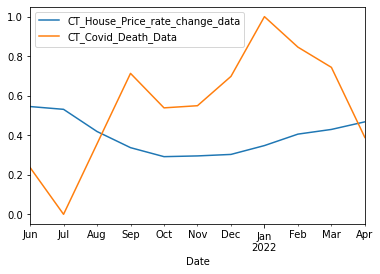

Death vs HPCR 
 -0.6504001033623031


In [210]:
a = house_df_fl_ct_ptc[(house_df_fl_ct_ptc['Date'] > '2021-05-31') & (house_df_fl_ct_ptc['Date'] < '2022-05-01')].copy()
b = merged_monthly_vaccine_df[(merged_monthly_vaccine_df['Date'] > '2021-05-31') & (merged_monthly_vaccine_df['Date'] < '2022-05-01')].copy()
f = monthly_case_FL_df[(monthly_case_FL_df['submission_date'] > '2021-05-31') & (monthly_case_FL_df['submission_date'] < '2022-05-01')].copy()
c = monthly_case_CT_df[(monthly_case_CT_df['submission_date'] > '2021-05-31') & (monthly_case_CT_df['submission_date'] < '2022-05-01')].copy()

a.rename(columns={'CT_Change': 'CT_House_Price_rate_change_data'}, inplace=True)
b.rename(columns={'CT_Change': 'CT_Vaccine_Data'}, inplace=True)
c.rename(columns={'submission_date': 'Date', 'CT_death': 'CT_Covid_Death_Data'}, inplace=True)

c['CT_Covid_Death_Data'] = np.log(c['CT_Covid_Death_Data'])
c['CT_Covid_Death_Data'] = (c['CT_Covid_Death_Data']-c['CT_Covid_Death_Data'].min())/(c['CT_Covid_Death_Data'].max()-c['CT_Covid_Death_Data'].min())

Covid_case_data_ct = c['CT_Covid_Death_Data'].to_numpy()

vaccine_data = b['CT_Vaccine_Data'].to_numpy()
house_data = a['CT_House_Price_rate_change_data'].to_numpy()

merged_data_a_b = (pd.merge(a, b, on='Date'))
merged_data_a_b_c = (pd.merge(merged_data_a_b, c, on='Date'))

merged_data_a_b_c.plot(x ='Date', y =['CT_House_Price_rate_change_data', 'CT_Covid_Death_Data'], kind="line")
plt.show()

pearson_object = Pearson_Correlation(vaccine_data, Covid_case_data_ct)
corr_case_vs_vacc = pearson_object.pearson_coefficient()

pearson_object = Pearson_Correlation(house_data, Covid_case_data_ct)
corr_case_vs_house = pearson_object.pearson_coefficient()

pearson_object = Pearson_Correlation(house_data, vaccine_data)
corr_house_vs_vacc = pearson_object.pearson_coefficient()

# print("HPCR vs vaccination \n", corr_house_vs_vacc)
print("Death vs HPCR \n", corr_case_vs_house)

merged_data_a_b = (pd.merge(a, b, on='Date'))
merged_data_a_b_c = (pd.merge(merged_data_a_b, c, on='Date'))

merged_data_a_b_c.plot(x ='Date', y =['CT_House_Price_rate_change_data', 'CT_Vaccine_Data', 'CT_Covid_Case_Data'], kind="line")
